<a href="https://colab.research.google.com/github/Namyalg/Projects_in_python/blob/master/2Dimensional_Convolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import PIL

In [0]:
from google.colab.patches import cv2_imshow

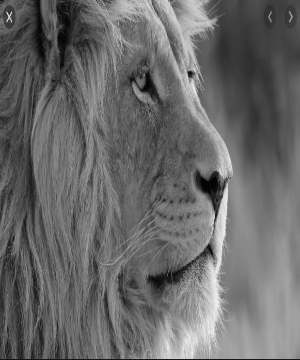

In [179]:
import numpy as np
import cv2

#Image is converted to grayscale
img = cv2.imread('/content/Lion.JPG',0)
img = cv2.resize(img, (300, 360))
cv2_imshow(img)

In [0]:
#The kernel used for creating a blur effect
kernel = np.array([0.11,0.11,0.11,0.11,0.11,0.11,0.11,0.11,0.11]).reshape(3,3)


In [0]:
pixels = []

#pixels are extracted from the image converted to grayscale
for i in range(360):
  for j in range(300):
    pixels.append(img[i,j])

#The pixels array is resized in accordance with the size of the image
pixels = np.array(pixels).reshape(360,300)

#To handle the edge cases, sentinel values are used
#The pixels array is bound by zeros on all edges

          # 00000000
          # 0PIXELS0
          # 00000000
#This is done to ensure that the kernel is applied to all the pixels

pixels = np.insert(pixels , [0,360] , np.zeros(len(pixels[0])) , axis = 0)
pixels = np.insert(pixels , [0,300] , np.zeros((len(pixels[:, 0]) ,1)) , axis = 1)

#Convolution is applied here
convoluted_matrix = []
for i in range(1,360):
  for j in range(1,300):
    temp = pixels[i:i+3 , j:j+3]
    product = np.multiply(temp,kernel)
    convoluted_matrix.append(sum(sum(product)))

convoluted_matrix = np.array(convoluted_matrix).reshape(359,299)

In [0]:
import numpy as np
from PIL import Image
array = (convoluted_matrix).astype(np.uint8)
img = Image.fromarray(array)
img.save('After_convolution.jpg')

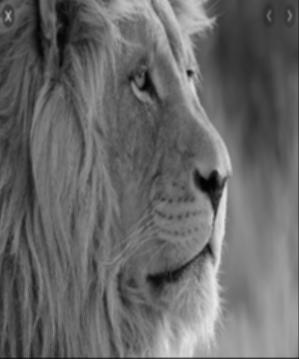

In [185]:
img = cv2.imread('/content/After_convolution.jpg')
cv2_imshow(img)